In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel(r"C:\Users\karthik\Desktop\Internship\CODEALPHA\Web Scraping\7494 Internships_ Summer Internships 2025 _ Paid Internships in India.xlsx")


In [9]:
df.head()

,Title,Company_name,activelyhiringbadge,Location,stipend,row1item
0,Founders Office,SkillCase,Actively hiring,Bangalore,"₹ 10,000 - 20,000 /month",6 Months
1,CA Articleship,ELMPL,Actively hiring,Gurgaon,"₹ 10,000 - 30,000 /month",36 Months
2,Swaraj Fellowship & Social Entrepreneurship,Hamari Pahchan NGO,Actively hiring,Work from home,Unpaid,4 Weeks
3,Chartered Accountancy (CA),Taxcellence Corporate Advisory,Actively hiring,Delhi,"₹ 4,000 - 7,000 /month",6 Months
4,Law/Legal,Finzo Ventures Private Limited,Actively hiring,Bangalore,"₹ 8,000 - 15,000 /month",6 Months


In [10]:
def parse_stipend(stipend_str):
    if pd.isnull(stipend_str) or 'Unpaid' in stipend_str:
        return np.nan, np.nan, np.nan
    try:
        stipend_str = stipend_str.replace('₹', '').replace('/month', '').replace(',', '')
        parts = stipend_str.split('-')
        min_stipend = int(parts[0].strip())
        max_stipend = int(parts[1].strip())
        avg_stipend = (min_stipend + max_stipend) / 2
        return min_stipend, max_stipend, avg_stipend
    except:
        return np.nan, np.nan, np.nan

stipends = df['stipend'].apply(parse_stipend)
df[['stipend_min', 'stipend_max', 'stipend_avg']] = pd.DataFrame(stipends.tolist(), index=df.index)

In [13]:
#CLEANING DURATION COLUMN
def parse_duration(duration_str):
    if 'Week' in duration_str:
        return round(int(duration_str.split()[0]) / 4, 1)
    else:
        return int(duration_str.split()[0])

df['duration_months'] = df['row1item'].apply(parse_duration)

In [14]:
#DROP UNPAID
df = df.dropna(subset=['stipend_avg'])

In [17]:
# 📊 ANALYSIS
print("\nTop 5 Highest Paying Internships")
print(df.sort_values(by='stipend_avg', ascending=False)[['Title', 'Company_name', 'stipend_avg']].head())



Top 5 Highest Paying Internships
                       Title  \
11            Product Design   
13                 Law/Legal   
10  B2B Business Development   
1             CA Articleship   
44              Inside Sales   

                                         Company_name  stipend_avg  
11                                             Scaler      32500.0  
13    MoveInSync Technology Solutions Private Limited      26000.0  
10                                             Scaler      22500.0  
1                                               ELMPL      20000.0  
44  Unacademy (Sorting Hat Technologies Private Li...      19000.0  


In [18]:
print("\nTop Locations")
print(df['Location'].value_counts().head())


Top Locations
Location
Bangalore         10
Mumbai             7
Noida              3
Work from home     3
Gurgaon            2
Name: count, dtype: int64


In [19]:
# 📈 VISUALIZATION
sns.set(style="whitegrid")

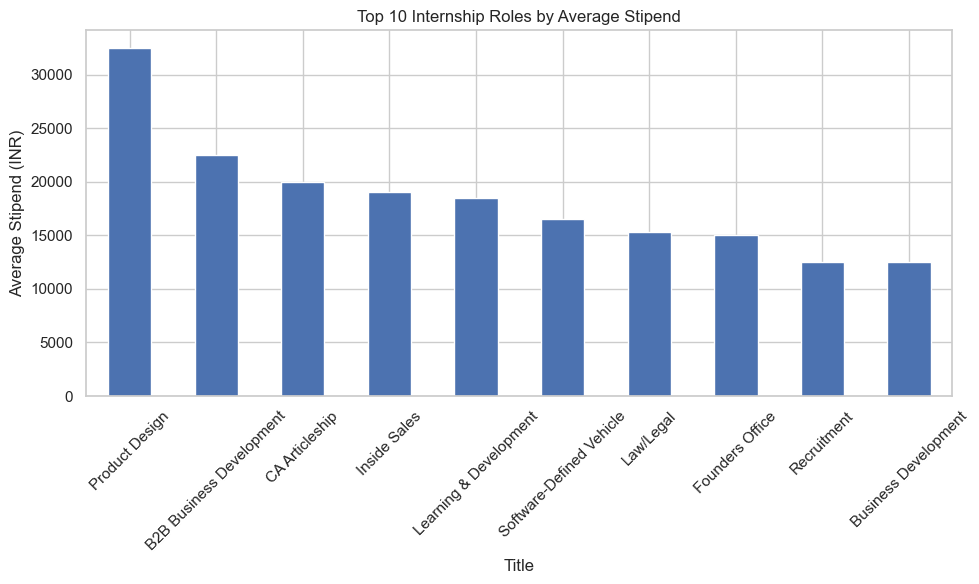

In [20]:
#AVG stipend by role
plt.figure(figsize=(10, 6))
df.groupby('Title')['stipend_avg'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Internship Roles by Average Stipend')
plt.ylabel('Average Stipend (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

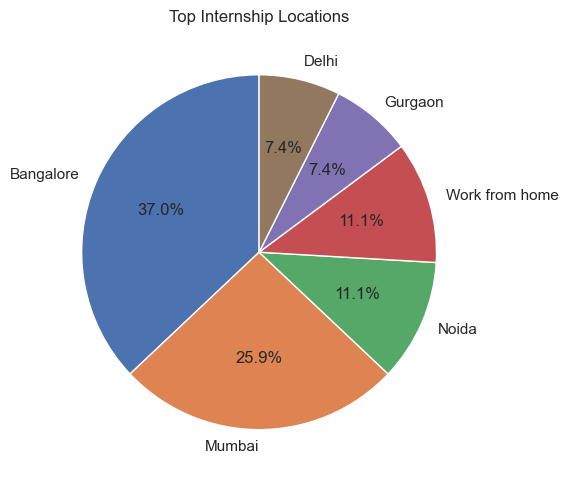

In [21]:
# Location distribution
plt.figure(figsize=(8, 5))
df['Location'].value_counts().head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top Internship Locations')
plt.ylabel('')
plt.tight_layout()
plt.show()

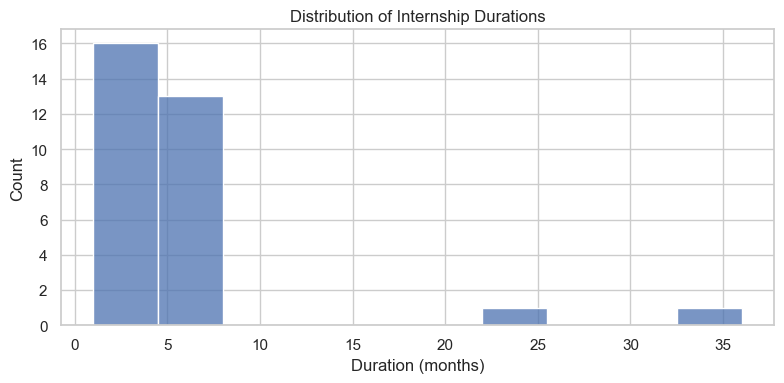

In [22]:
# Duration histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['duration_months'], bins=10, kde=False)
plt.title('Distribution of Internship Durations')
plt.xlabel('Duration (months)')
plt.tight_layout()
plt.show()

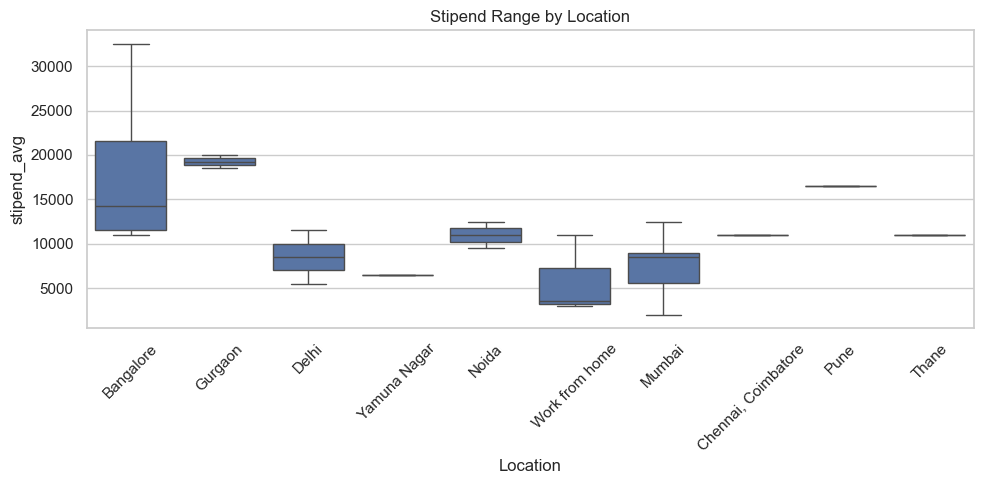

In [23]:
# Boxplot of stipend ranges
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Location', y='stipend_avg')
plt.title('Stipend Range by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
print("Analysis complete! Thank you\n— by Addula Tharun Kumar Reddy")


Analysis complete! Thank you
— by Addula Tharun Kumar Reddy
